# Introduction to Financial Engineering - Group Assignment

    Neehal Bajaj B20AI026
    Ayush Abrol B20AI052

---

## CRR Binomial Tree Model

### Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import numpy as np
from scipy.stats import norm
import scipy.optimize as sco

import yfinance as yf
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

c:\Users\Ayush Abrol\AppData\Local\Programs\Python\Python37\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


### Picking 3 stocks (Microsoft, Amazon, Google) from the market from 1 Januaray, 2023 to 15 April, 2023

In [2]:
data = yf.download(tickers = 'MSFT AMZN GOOG',
                     start = datetime(2023, 1, 1),
                        end = datetime(2023, 4, 15),
                        progress = False)

### Visualizing the dataframe

In [3]:
data

Adj Close                               Close              \
                  AMZN        GOOG        MSFT        AMZN        GOOG   
Date                                                                     
2023-01-03   85.820000   89.699997  238.981430   85.820000   89.699997   
2023-01-04   85.139999   88.709999  228.527618   85.139999   88.709999   
2023-01-05   83.120003   86.769997  221.754562   83.120003   86.769997   
2023-01-06   86.080002   88.160004  224.368011   86.080002   88.160004   
2023-01-09   87.360001   88.800003  226.552551   87.360001   88.800003   
...                ...         ...         ...         ...         ...   
2023-04-10  102.169998  106.949997  289.390015  102.169998  106.949997   
2023-04-11   99.919998  106.120003  282.829987   99.919998  106.120003   
2023-04-12   97.830002  105.220001  283.489990   97.830002  105.220001   
2023-04-13  102.400002  108.190002  289.839996  102.400002  108.190002   
2023-04-14  102.510002  109.459999  286.140015  102.510002  109.459999   

                              High                                 Low  \
                  MSFT        AMZN        GOOG        MSFT        AMZN   
Date                                                                     
2023-01-03  239.580002   86.959999   91.550003  245.750000   84.209999   
2023-01-04  229.100006   86.980003   91.239998  232.869995   83.360001   
2023-01-05  222.309998   85.419998   88.209999  227.550003   83.070000   
2023-01-06  224.929993   86.400002   88.470001  225.759995   81.430000   
2023-01-09  227.119995   89.480003   90.830002  231.240005   87.080002   
...                ...         ...         ...         ...         ...   
2023-04-10  289.390015  102.199997  107.970001  289.600006   99.570000   
2023-04-11  282.829987  101.000000  107.220001  285.980011   99.010002   
2023-04-12  283.489990  100.510002  107.586998  287.010010   97.709999   
2023-04-13  289.839996  102.570000  108.264999  289.899994   98.709999   
2023-04-14  286.140015  103.199997  109.580002  288.480011  101.110001   

                                          Open                          \
                  GOOG        MSFT        AMZN        GOOG        MSFT   
Date                                                                     
2023-01-03   89.019997  237.399994   85.459999   89.830002  243.080002   
2023-01-04   87.800003  225.960007   86.550003   91.010002  232.279999   
2023-01-05   86.559998  221.759995   85.330002   88.070000  227.199997   
2023-01-06   85.570000  219.350006   83.029999   87.360001  223.000000   
2023-01-09   88.580002  226.410004   87.459999   89.195000  226.449997   
...                ...         ...         ...         ...         ...   
2023-04-10  105.599998  284.709991  100.959999  107.389999  289.209991   
2023-04-11  105.279999  281.640015  100.800003  106.919998  285.750000   
2023-04-12  104.970001  281.959991  100.400002  107.389999  284.790009   
2023-04-13  106.440002  283.170013   98.949997  106.470001  283.589996   
2023-04-14  107.589996  283.690002  102.070000  107.690002  287.000000   

              Volume                      
                AMZN      GOOG      MSFT  
Date                                      
2023-01-03  76706000  20738500  25740000  
2023-01-04  68885100  27046500  50623400  
2023-01-05  67930800  23136100  39585600  
2023-01-06  83303400  26612600  43613600  
2023-01-09  65266100  22996700  27369800  
...              ...       ...       ...  
2023-04-10  37261200  19741500  23103000  
2023-04-11  60417800  18721300  27276600  
2023-04-12  56735000  22761600  27403400  
2023-04-13  67925100  21650700  24222700  
2023-04-14  51388300  20745400  20973900  

[71 rows x 18 columns]

### Taking up only the adjusted close price of the 3 stocks and storing them in a dataframe

In [4]:
data_close = data['Adj Close']
data_close

,AMZN,GOOG,MSFT
Date,,,
2023-01-03,85.820000,89.699997,238.981430
2023-01-04,85.139999,88.709999,228.527618
2023-01-05,83.120003,86.769997,221.754562
2023-01-06,86.080002,88.160004,224.368011
2023-01-09,87.360001,88.800003,226.552551
...,...,...,...
2023-04-10,102.169998,106.949997,289.390015
2023-04-11,99.919998,106.120003,282.829987
2023-04-12,97.830002,105.220001,283.489990


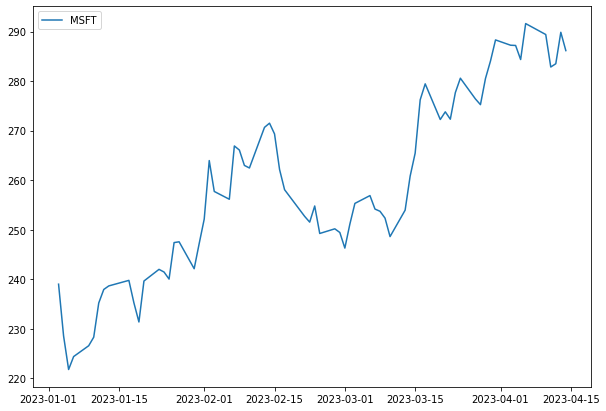

In [5]:
# Plotting MSFT on a graph
plt.figure(figsize=(10, 7))
plt.plot(data_close['MSFT'], label='MSFT')
plt.legend(loc='best')
plt.show()

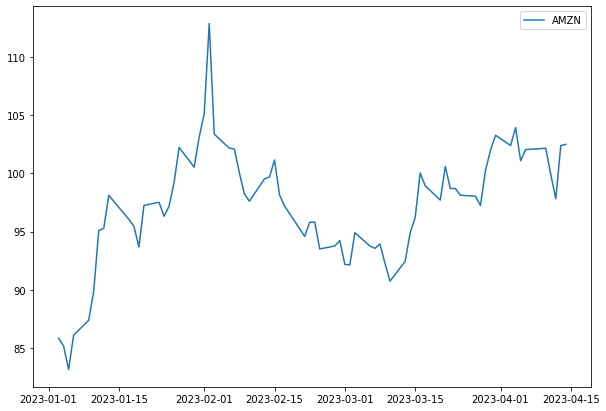

In [6]:
# Plotting AMZN on a graph
plt.figure(figsize=(10, 7))
plt.plot(data_close['AMZN'], label='AMZN')
plt.legend(loc='best')
plt.show()

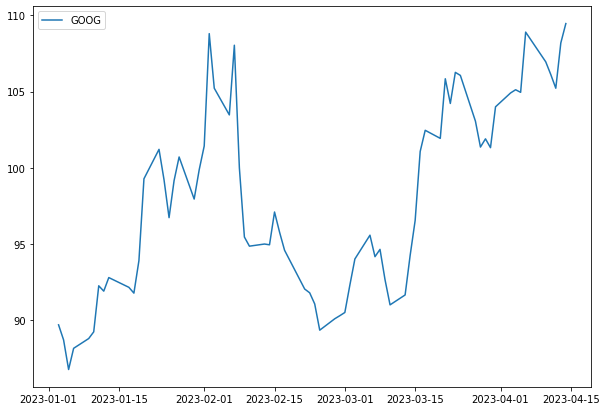

In [7]:
# Plotting GOOG on a graph
plt.figure(figsize=(10, 7))
plt.plot(data_close['GOOG'], label='GOOG')
plt.legend(loc='best')
plt.show()

### Plotting the adjusted close price of the 3 stocks

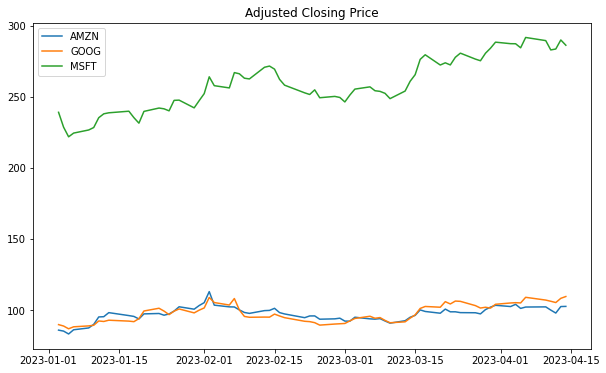

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data_close)
plt.title('Adjusted Closing Price')
plt.legend(data_close.columns.values)
plt.show()

### Calculating the daily returns of the 3 stocks

In [9]:
returns = data_close.pct_change()
returns

,AMZN,GOOG,MSFT
Date,,,
2023-01-03,NaN,NaN,NaN
2023-01-04,-0.007924,-0.011037,-0.043743
2023-01-05,-0.023726,-0.021869,-0.029638
2023-01-06,0.035611,0.016019,0.011785
2023-01-09,0.014870,0.007260,0.009736
...,...,...,...
2023-04-10,0.001078,-0.017906,-0.007579
2023-04-11,-0.022022,-0.007761,-0.022668
2023-04-12,-0.020917,-0.008481,0.002334


### Defining the function to calculate the european put option price for given stock price, strike price, risk free rate, volatility, time to maturity and number of steps in the binomial tree

In [10]:
def european_put_crr(S, K, r, sigma, T, N):
    """Calculates the price of a European put option using the CRR binomial model"""
    delta_t = T / N
    u = np.exp(sigma * np.sqrt(delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t) - d) / (u - d)
    S_t = np.zeros((N + 1, N + 1))
    S_t[0, 0] = S
    for i in range(1, N + 1):
        S_t[i, 0] = S_t[i - 1, 0] * u
        for j in range(1, i + 1):
            S_t[i, j] = S_t[i - 1, j - 1] * d
    V_t = np.zeros((N + 1, N + 1))
    for j in range(N + 1):
        V_t[N, j] = max(K - S_t[N, j], 0)
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            V_t[i, j] = np.exp(-r * delta_t) * (p * V_t[i + 1, j] + (1 - p) * V_t[i + 1, j + 1])
    return V_t[0, 0]

### Defining the function to calculate the american put option price for given stock price, strike price, risk free rate, volatility, time to maturity and number of steps in the binomial tree

In [11]:
def american_put_crr(S, K, r, sigma, T, N):
    """Calculates the price of an American put option using the CRR binomial model"""
    delta_t = T / N
    u = np.exp(sigma * np.sqrt(delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t) - d) / (u - d)
    S_t = np.zeros((N + 1, N + 1))
    S_t[0, 0] = S
    for i in range(1, N + 1):
        S_t[i, 0] = S_t[i - 1, 0] * u
        for j in range(1, i + 1):
            S_t[i, j] = S_t[i - 1, j - 1] * d
    V_t = np.zeros((N + 1, N + 1))
    for j in range(N + 1):
        V_t[N, j] = max(K - S_t[N, j], 0)
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            exercise = K - S_t[i, j]
            V_t[i, j] = max(exercise, np.exp(-r * delta_t) * (p * V_t[i + 1, j] + (1 - p) * V_t[i + 1, j + 1]))
    return V_t[0, 0]

### Defining the parameters risk-free rate, volatility and current stock price for all the 3 stocks

Also, creating a list of different strike prices and expiry dates for the 3 stocks

In [12]:
# Risk-free rate
r = [0.05, 0.05, 0.05]

# Getting the volatility of the stock from the data
sigma = returns.std() * 250 ** 0.5

# Current stock price
S = data_close.iloc[-1] 

strikes = [230, 250, 270, 290, 310, 330, 350]
expiries = [0.25, 0.5, 0.75, 1]

### Creating a dictionary to store the put option prices for all the 3 stocks for different strike prices and expiry dates for both the european and american put options.

PS: The dictionary contains the option prices for 2 Steps to 10 Steps in the binomial tree

In [13]:
results_dict = {}

### Defining a print results function

In [14]:
def print_results(option_type, K, T, prices, results_dict, stock):
    """Prints the results of the CRR binomial model"""
    results_dict[(stock, option_type, K, T)] = prices
    print(f"{option_type} put option with strike price {K:.2f} and expiry in {T:.2f} years:")
    for i, price in enumerate(prices):
        print(f"  {i+2}-step: {price:.2f}")
    print()

### For the 1st stock (Microsoft)

In [15]:
print("MSFT")
for K in strikes:
    for T in expiries:
        prices_european = [european_put_crr(S['MSFT'], K, r[0], sigma['MSFT'], T, N) for N in range(2, 11)]
        prices_american = [american_put_crr(S['MSFT'], K, r[0], sigma['MSFT'], T, N) for N in range(2, 11)]
        print_results("European", K, T, prices_european, results_dict, 'MSFT')
        print_results("American", K, T, prices_american, results_dict, 'MSFT')

MSFT
European put option with strike price 230.00 and expiry in 0.25 years:
  2-step: 0.00
  3-step: 1.09
  4-step: 1.07
  5-step: 0.75
  6-step: 0.99
  7-step: 1.03
  8-step: 0.81
  9-step: 1.03
  10-step: 0.98

American put option with strike price 230.00 and expiry in 0.25 years:
  2-step: 0.00
  3-step: 1.09
  4-step: 1.07
  5-step: 0.75
  6-step: 1.00
  7-step: 1.03
  8-step: 0.81
  9-step: 1.04
  10-step: 0.98

European put option with strike price 230.00 and expiry in 0.50 years:
  2-step: 4.21
  3-step: 3.73
  4-step: 2.51
  5-step: 3.66
  6-step: 3.30
  7-step: 3.19
  8-step: 3.50
  9-step: 2.97
  10-step: 3.46

American put option with strike price 230.00 and expiry in 0.50 years:
  2-step: 4.21
  3-step: 3.73
  4-step: 2.57
  5-step: 3.73
  6-step: 3.33
  7-step: 3.30
  8-step: 3.55
  9-step: 3.04
  10-step: 3.53

European put option with strike price 230.00 and expiry in 0.75 years:
  2-step: 7.37
  3-step: 5.50
  4-step: 5.57
  5-step: 6.07
  6-step: 4.84
  7-step: 5.94
  

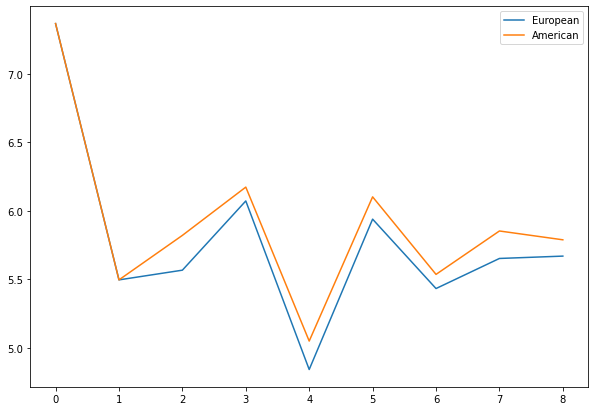

In [43]:
# Plot for strike price 230 and expiry 0.75 
plt.figure(figsize=(10, 7))
plt.plot(results_dict[('MSFT', 'European', 230, 0.75)], label='European')
plt.plot(results_dict[('MSFT', 'American', 230, 0.75)], label='American')
plt.legend(loc='best')
plt.show()

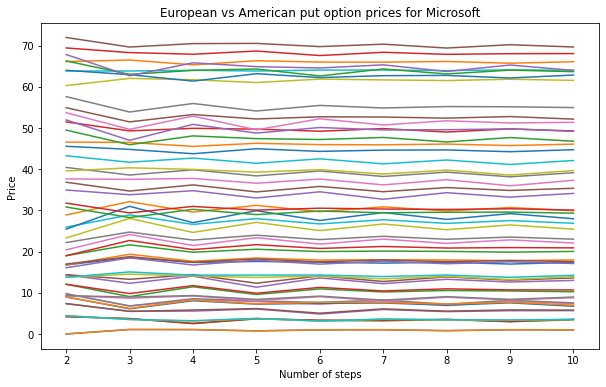

In [19]:
plt.figure(figsize=(10, 6))
for K in strikes:
    for T in expiries:
        plt.plot(range(2, 11), [results_dict[('MSFT', 'European', K, T)][i - 2] for i in range(2, 11)], label=f"E K={K} T={T}")
        plt.plot(range(2, 11), [results_dict[('MSFT', 'American', K, T)][i - 2] for i in range(2, 11)], label=f"A K={K} T={T}")
plt.title("European vs American put option prices for Microsoft")
plt.xlabel("Number of steps")
plt.ylabel("Price")
# plt.legend(loc = '')
plt.show()

### For the 2nd stock (Amazon)

In [21]:
print("AMZN")
for K in strikes:
    for T in expiries:
        prices_european = [european_put_crr(S['AMZN'], K, r[1], sigma['AMZN'], T, N) for N in range(2, 11)]
        prices_american = [american_put_crr(S['AMZN'], K, r[1], sigma['AMZN'], T, N) for N in range(2, 11)]
        print_results("European", K, T, prices_european, results_dict, 'AMZN')
        print_results("American", K, T, prices_american, results_dict, 'AMZN')

AMZN
European put option with strike price 230.00 and expiry in 0.25 years:
  2-step: 124.63
  3-step: 124.63
  4-step: 124.63
  5-step: 124.63
  6-step: 124.63
  7-step: 124.63
  8-step: 124.63
  9-step: 124.63
  10-step: 124.63

American put option with strike price 230.00 and expiry in 0.25 years:
  2-step: 127.49
  3-step: 127.49
  4-step: 127.49
  5-step: 127.49
  6-step: 127.49
  7-step: 127.49
  8-step: 127.49
  9-step: 127.49
  10-step: 127.49

European put option with strike price 230.00 and expiry in 0.50 years:
  2-step: 121.81
  3-step: 121.81
  4-step: 121.81
  5-step: 121.81
  6-step: 121.81
  7-step: 121.81
  8-step: 121.81
  9-step: 121.81
  10-step: 121.82

American put option with strike price 230.00 and expiry in 0.50 years:
  2-step: 127.49
  3-step: 127.49
  4-step: 127.49
  5-step: 127.49
  6-step: 127.49
  7-step: 127.49
  8-step: 127.49
  9-step: 127.49
  10-step: 127.49

European put option with strike price 230.00 and expiry in 0.75 years:
  2-step: 119.02
  3

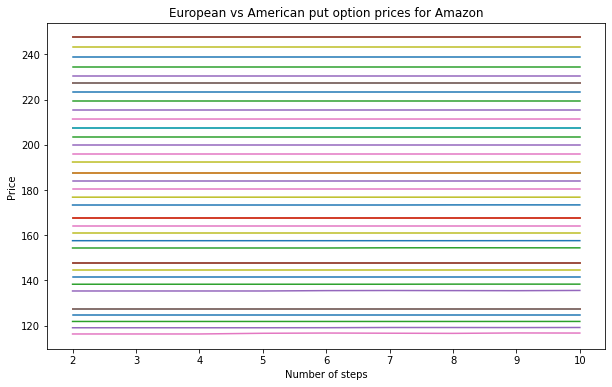

In [38]:
plt.figure(figsize=(10, 6))
for K in strikes:
    for T in expiries:
        plt.plot(range(2, 11), [results_dict[('AMZN', 'European', K, T)][i - 2] for i in range(2, 11)], label=f"European K={K} T={T}")
        plt.plot(range(2, 11), [results_dict[('AMZN', 'American', K, T)][i - 2] for i in range(2, 11)], label=f"American K={K} T={T}")
plt.title("European vs American put option prices for Amazon")
plt.xlabel("Number of steps")
plt.ylabel("Price")
# plt.legend()
plt.show()

### For the 3rd stock (Google)

In [23]:
print("GOOG")
for K in strikes:
    for T in expiries:
        prices_european = [european_put_crr(S['GOOG'], K, r[2], sigma['GOOG'], T, N) for N in range(2, 11)]
        prices_american = [american_put_crr(S['GOOG'], K, r[2], sigma['GOOG'], T, N) for N in range(2, 11)]
        print_results("European", K, T, prices_european, results_dict, 'GOOG')
        print_results("American", K, T, prices_american, results_dict, 'GOOG')

GOOG
European put option with strike price 230.00 and expiry in 0.25 years:
  2-step: 117.68
  3-step: 117.68
  4-step: 117.68
  5-step: 117.68
  6-step: 117.68
  7-step: 117.68
  8-step: 117.68
  9-step: 117.68
  10-step: 117.68

American put option with strike price 230.00 and expiry in 0.25 years:
  2-step: 120.54
  3-step: 120.54
  4-step: 120.54
  5-step: 120.54
  6-step: 120.54
  7-step: 120.54
  8-step: 120.54
  9-step: 120.54
  10-step: 120.54

European put option with strike price 230.00 and expiry in 0.50 years:
  2-step: 114.86
  3-step: 114.86
  4-step: 114.86
  5-step: 114.86
  6-step: 114.86
  7-step: 114.86
  8-step: 114.88
  9-step: 114.89
  10-step: 114.88

American put option with strike price 230.00 and expiry in 0.50 years:
  2-step: 120.54
  3-step: 120.54
  4-step: 120.54
  5-step: 120.54
  6-step: 120.54
  7-step: 120.54
  8-step: 120.54
  9-step: 120.54
  10-step: 120.54

European put option with strike price 230.00 and expiry in 0.75 years:
  2-step: 112.07
  3

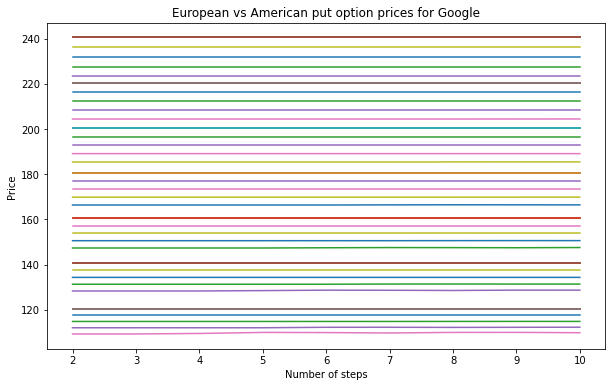

In [39]:
plt.figure(figsize=(10, 6))
for K in strikes:
    for T in expiries:
        plt.plot(range(2, 11), [results_dict[('GOOG', 'European', K, T)][i - 2] for i in range(2, 11)], label=f"European K={K} T={T}")
        plt.plot(range(2, 11), [results_dict[('GOOG', 'American', K, T)][i - 2] for i in range(2, 11)], label=f"American K={K} T={T}")
plt.title("European vs American put option prices for Google")
plt.xlabel("Number of steps")
plt.ylabel("Price")
# plt.legend()
plt.show()

### Showing the  results in a tabular format

In [25]:
res = pd.DataFrame(results_dict).T
res.columns = [f"{i+2}-step" for i in range(9)]
res

2-step      3-step      4-step      5-step  \
MSFT European 230 0.25    0.000000    1.086311    1.065759    0.753519   
     American 230 0.25    0.000000    1.086311    1.065759    0.753519   
     European 230 0.50    4.207642    3.733461    2.507167    3.662792   
     American 230 0.50    4.207642    3.733461    2.572742    3.731388   
     European 230 0.75    7.368439    5.495056    5.565958    6.071927   
...                            ...         ...         ...         ...   
GOOG American 350 0.50  240.540001  240.540001  240.540001  240.540001   
     European 350 0.75  227.658047  227.658047  227.658047  227.658047   
     American 350 0.75  240.540001  240.540001  240.540001  240.540001   
     European 350 1.00  223.470299  223.470299  223.470299  223.470299   
     American 350 1.00  240.540001  240.540001  240.540001  240.540001   

                            6-step      7-step      8-step      9-step  \
MSFT European 230 0.25    0.988718    1.026107    0.806151    1.025311   
     American 230 0.25    1.003238    1.032316    0.810286    1.038610   
     European 230 0.50    3.303154    3.191073    3.499349    2.974301   
     American 230 0.50    3.331629    3.301499    3.552844    3.036797   
     European 230 0.75    4.839920    5.938921    5.431734    5.651546   
...                            ...         ...         ...         ...   
GOOG American 350 0.50  240.540001  240.540001  240.540001  240.540001   
     European 350 0.75  227.658047  227.658047  227.658047  227.658047   
     American 350 0.75  240.540001  240.540001  240.540001  240.540001   
     European 350 1.00  223.470299  223.470299  223.470299  223.470299   
     American 350 1.00  240.540001  240.540001  240.540001  240.540001   

                           10-step  
MSFT European 230 0.25    0.976266  
     American 230 0.25    0.982782  
     European 230 0.50    3.456414  
     American 230 0.50    3.529256  
     European 230 0.75    5.668748  
...                            ...  
GOOG American 350 0.50  240.540001  
     European 350 0.75  227.658047  
     American 350 0.75  240.540001  
     European 350 1.00  223.481773  
     American 350 1.00  240.540001  

[168 rows x 9 columns]

### Storing the results in a csv file

In [26]:
res.to_csv("results_crr_binomial.csv")

## Black Scholes Model

### Using Black Scholes equation to obtain the same.

In [27]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

In [28]:
def european_put_bs(S, K, r, sigma, T):
    price = black_scholes(S, K, r, sigma, T, option_type='put')
    return price

As, we know that the Black-Scholes model is only used to price European options and does not take into account that American options could be exercised before the expiration date of the option. So, we will use the Black-Scholes model to price the European put options only.

### Creating a dictionary to store the put option prices for all the 3 stocks for different strike prices and expiry dates for the european put options in the Black Scholes model.

In [29]:
results_dict_bs = {}

### For the 1st stock (Microsoft)

In [30]:
print("MSFT")
for K in strikes:
    for T in expiries:
        price_european_bs = european_put_bs(S['MSFT'], K, r[0], sigma['MSFT'], T)
        print(f"European put option with strike price {K:.2f} and expiry in {T:.2f} years: {price_european_bs:.2f}")
        results_dict_bs[('MSFT', 'European', K, T)] = price_european_bs

MSFT
European put option with strike price 230.00 and expiry in 0.25 years: 0.00
European put option with strike price 230.00 and expiry in 0.50 years: 0.19
European put option with strike price 230.00 and expiry in 0.75 years: 1.59
European put option with strike price 230.00 and expiry in 1.00 years: 4.35
European put option with strike price 250.00 and expiry in 0.25 years: 0.02
European put option with strike price 250.00 and expiry in 0.50 years: 1.24
European put option with strike price 250.00 and expiry in 0.75 years: 4.51
European put option with strike price 250.00 and expiry in 1.00 years: 8.88
European put option with strike price 270.00 and expiry in 0.25 years: 0.69
European put option with strike price 270.00 and expiry in 0.50 years: 4.77
European put option with strike price 270.00 and expiry in 0.75 years: 10.10
European put option with strike price 270.00 and expiry in 1.00 years: 15.80
European put option with strike price 290.00 and expiry in 0.25 years: 6.16
Europ

### For the 2nd stock (Amazon)

In [31]:
print("AMZN")
for K in strikes:
    for T in expiries:
        price_european_bs = european_put_bs(S['AMZN'], K, r[1], sigma['AMZN'], T)
        print(f"European put option with strike price {K:.2f} and expiry in {T:.2f} years: {price_european_bs:.2f}")
        results_dict_bs[('AMZN', 'European', K, T)] = price_european_bs

AMZN
European put option with strike price 230.00 and expiry in 0.25 years: 123.12
European put option with strike price 230.00 and expiry in 0.50 years: 123.12
European put option with strike price 230.00 and expiry in 0.75 years: 123.12
European put option with strike price 230.00 and expiry in 1.00 years: 123.12
European put option with strike price 250.00 and expiry in 0.25 years: 142.74
European put option with strike price 250.00 and expiry in 0.50 years: 142.74
European put option with strike price 250.00 and expiry in 0.75 years: 142.74
European put option with strike price 250.00 and expiry in 1.00 years: 142.74
European put option with strike price 270.00 and expiry in 0.25 years: 162.36
European put option with strike price 270.00 and expiry in 0.50 years: 162.36
European put option with strike price 270.00 and expiry in 0.75 years: 162.36
European put option with strike price 270.00 and expiry in 1.00 years: 162.36
European put option with strike price 290.00 and expiry in 

### For the 3rd stock (Google)

In [32]:
print("GOOG")
for K in strikes:
    for T in expiries:
        price_european_bs = european_put_bs(S['GOOG'], K, r[2], sigma['GOOG'], T)
        print(f"European put option with strike price {K:.2f} and expiry in {T:.2f} years: {price_european_bs:.2f}")
        results_dict_bs[('GOOG', 'European', K, T)] = price_european_bs

GOOG
European put option with strike price 230.00 and expiry in 0.25 years: 116.20
European put option with strike price 230.00 and expiry in 0.50 years: 116.20
European put option with strike price 230.00 and expiry in 0.75 years: 116.20
European put option with strike price 230.00 and expiry in 1.00 years: 116.21
European put option with strike price 250.00 and expiry in 0.25 years: 135.83
European put option with strike price 250.00 and expiry in 0.50 years: 135.83
European put option with strike price 250.00 and expiry in 0.75 years: 135.83
European put option with strike price 250.00 and expiry in 1.00 years: 135.83
European put option with strike price 270.00 and expiry in 0.25 years: 155.45
European put option with strike price 270.00 and expiry in 0.50 years: 155.45
European put option with strike price 270.00 and expiry in 0.75 years: 155.45
European put option with strike price 270.00 and expiry in 1.00 years: 155.45
European put option with strike price 290.00 and expiry in 

### Showing the  results in a tabular format

In [33]:
res_bs = pd.DataFrame(results_dict_bs, index=[0]).T
res_bs.columns = ['Black-Scholes price (Put Option)']
res_bs

Black-Scholes price (Put Option)
MSFT European 230 0.25                          0.000046
                  0.50                          0.190777
                  0.75                          1.592692
                  1.00                          4.347388
              250 0.25                          0.016686
...                                                  ...
GOOG European 330 1.00                        214.316879
              350 0.25                        233.939715
                  0.50                        233.939715
                  0.75                        233.939715
                  1.00                        233.939716

[84 rows x 1 columns]

### Storing the results in a csv file

In [34]:
res_bs.to_csv("results_black_scholes.csv")

## Verifying that the Black Scholes formula is limiting case of Binomial model.

As the number of time steps (N) in the Binomial model becomes very large, the model converges to the continuous-time Black Scholes model. Specifically, the Cox-Ross-Rubinstein (CRR) Binomial model converges to the Black-Scholes-Merton model as N approaches infinity.

This convergence can be demonstrated by increasing the number of time steps in the Binomial model and comparing the results to the Black Scholes formula. As N gets larger, the results of the Binomial model should approach those of the Black Scholes formula.

We have set N = 3000 in the Binomial model and compared the results to the Black Scholes formula.

    - The difference between the Binomial model and the Black Scholes formula should be close to zero.

### Creating a dictionary to store the difference between the put option prices for all the 3 stocks for different strike prices and expiry dates for the european put options in the Black Scholes model and the Binomial model with 1000 steps (A large number)

In [35]:
res_bs_crr_diff = {}

### For the 1st stock (Microsoft)

In [36]:
print("MSFT")
for K in strikes:
    for T in expiries:
        price_european_bs = european_put_bs(S['MSFT'], K, r[0], sigma['MSFT'], T)
        price_european_crr = european_put_crr(S['MSFT'], K, r[0], sigma['MSFT'], T, 1000)
        print(f"Differnce between European put option with strike price {K:.2f} and expiry in {T:.2f} years and Black-scholes European put : {price_european_bs - price_european_crr:.2f}")
        res_bs_crr_diff[('MSFT', 'European', K, T)] = price_european_bs - price_european_crr

MSFT
Differnce between European put option with strike price 230.00 and expiry in 0.25 years and Black-scholes European put : -0.99
Differnce between European put option with strike price 230.00 and expiry in 0.50 years and Black-scholes European put : -3.08
Differnce between European put option with strike price 230.00 and expiry in 0.75 years and Black-scholes European put : -3.88
Differnce between European put option with strike price 230.00 and expiry in 1.00 years and Black-scholes European put : -3.08
Differnce between European put option with strike price 250.00 and expiry in 0.25 years and Black-scholes European put : -3.34
Differnce between European put option with strike price 250.00 and expiry in 0.50 years and Black-scholes European put : -5.92
Differnce between European put option with strike price 250.00 and expiry in 0.75 years and Black-scholes European put : -5.65
Differnce between European put option with strike price 250.00 and expiry in 1.00 years and Black-scholes 

In [46]:
res_bs_crr_diff

{('MSFT', 'European', 230, 0.25): -0.9904752870241629,
 ('MSFT', 'European', 230, 0.5): -3.080237784320403,
 ('MSFT', 'European', 230, 0.75): -3.882088608136023,
 ('MSFT', 'European', 230, 1): -3.0848515395894154,
 ('MSFT', 'European', 250, 0.25): -3.3411143446011042,
 ('MSFT', 'European', 250, 0.5): -5.922198031626932,
 ('MSFT', 'European', 250, 0.75): -5.650294835263409,
 ('MSFT', 'European', 250, 1): -3.7134030573822336,
 ('MSFT', 'European', 270, 0.25): -7.775631207431587,
 ('MSFT', 'European', 270, 0.5): -8.646286317753356,
 ('MSFT', 'European', 270, 0.75): -6.799360407472278,
 ('MSFT', 'European', 270, 1): -3.772300238667082,
 ('MSFT', 'European', 290, 0.25): -10.970286808015725,
 ('MSFT', 'European', 290, 0.5): -9.71824423583233,
 ('MSFT', 'European', 290, 0.75): -6.855237870978986,
 ('MSFT', 'European', 290, 1): -3.1559078151732685,
 ('MSFT', 'European', 310, 0.25): -9.102010595172338,
 ('MSFT', 'European', 310, 0.5): -8.622094846683574,
 ('MSFT', 'European', 310, 0.75): -5.771

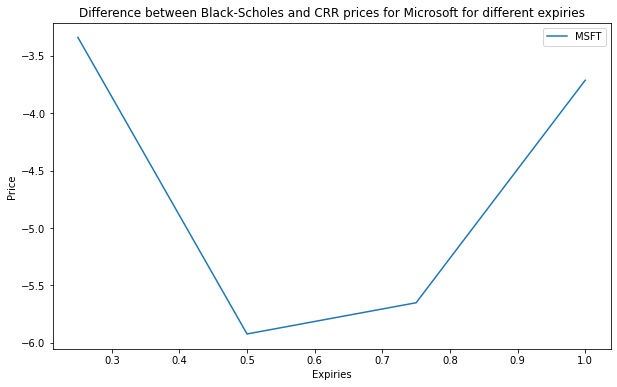

In [49]:
# Plot the difference between the Black-Scholes price and the CRR price for strike price = 250 for all expiring dates
plt.figure(figsize=(10, 6))
plt.plot(expiries, [res_bs_crr_diff[('MSFT', 'European', 250, T)] for T in expiries], label="MSFT")
plt.title("Difference between Black-Scholes and CRR prices for Microsoft for different expiries")
plt.xlabel("Expiries")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Plot a graph of the difference between the Black-Scholes price and the CRR price for the European put option
plt.figure(figsize=(10, 6))
for K in strikes:
    for T in expiries:
        plt.plot(range(2, 11), [res_bs_crr_diff[('MSFT', 'European', K, T)][i - 2] for i in range(2, 11)], label=f"K={K} T={T}")
plt.title("Difference between Black-Scholes and CRR European put option prices for Microsoft")
plt.xlabel("Number of steps")
plt.ylabel("Price")
plt.legend()
plt.show()

### For the 2nd stock (Amazon)

In [64]:
print("AMZN")
for K in strikes:
    for T in expiries:
        price_european_bs = european_put_bs(S['AMZN'], K, r[1], sigma['AMZN'], T)
        price_european_crr = european_put_crr(S['AMZN'], K, r[1], sigma['AMZN'], T, 1000)
        print(f"Differnce between European put option with strike price {K:.2f} and expiry in {T:.2f} years and Black-scholes European put : {price_european_bs - price_european_crr:.2f}")
        res_bs_crr_diff[('AMZN', 'European', K, T)] = price_european_bs - price_european_crr

AMZN
Differnce between European put option with strike price 230.00 and expiry in 0.25 years and Black-scholes European put : -1.52
Differnce between European put option with strike price 230.00 and expiry in 0.50 years and Black-scholes European put : 1.28
Differnce between European put option with strike price 230.00 and expiry in 0.75 years and Black-scholes European put : 3.92
Differnce between European put option with strike price 230.00 and expiry in 1.00 years and Black-scholes European put : 6.33
Differnce between European put option with strike price 250.00 and expiry in 0.25 years and Black-scholes European put : -1.65
Differnce between European put option with strike price 250.00 and expiry in 0.50 years and Black-scholes European put : 1.41
Differnce between European put option with strike price 250.00 and expiry in 0.75 years and Black-scholes European put : 4.36
Differnce between European put option with strike price 250.00 and expiry in 1.00 years and Black-scholes Europ

### For the 3rd stock (Google)

In [65]:
print("GOOG")
for K in strikes:
    for T in expiries:
        price_european_bs = european_put_bs(S['GOOG'], K, r[2], sigma['GOOG'], T)
        price_european_crr = european_put_crr(S['GOOG'], K, r[2], sigma['GOOG'], T, 1000)
        print(f"Differnce between European put option with strike price {K:.2f} and expiry in {T:.2f} years and Black-scholes European put : {price_european_bs - price_european_crr:.2f}")
        res_bs_crr_diff[('GOOG', 'European', K, T)] = price_european_bs - price_european_crr

GOOG
Differnce between European put option with strike price 230.00 and expiry in 0.25 years and Black-scholes European put : -1.48
Differnce between European put option with strike price 230.00 and expiry in 0.50 years and Black-scholes European put : 1.29
Differnce between European put option with strike price 230.00 and expiry in 0.75 years and Black-scholes European put : 3.83
Differnce between European put option with strike price 230.00 and expiry in 1.00 years and Black-scholes European put : 6.10
Differnce between European put option with strike price 250.00 and expiry in 0.25 years and Black-scholes European put : -1.61
Differnce between European put option with strike price 250.00 and expiry in 0.50 years and Black-scholes European put : 1.44
Differnce between European put option with strike price 250.00 and expiry in 0.75 years and Black-scholes European put : 4.34
Differnce between European put option with strike price 250.00 and expiry in 1.00 years and Black-scholes Europ

### Showing the  results in a tabular format

In [66]:
results_bs_crr_diff = pd.DataFrame(res_bs_crr_diff, index=[0]).T
results_bs_crr_diff.columns = ['Difference between Black-Scholes and CRR at large N (1000)']
results_bs_crr_diff

Difference between Black-Scholes and CRR at large N (1000)
MSFT European 230 0.25                                          -0.990475         
                  0.50                                          -3.080238         
                  0.75                                          -3.882089         
                  1.00                                          -3.084852         
              250 0.25                                          -3.341114         
...                                                                   ...         
GOOG European 330 1.00                                           9.812521         
              350 0.25                                          -2.252516         
                  0.50                                           2.041116         
                  0.75                                           6.276548         
                  1.00                                          10.433709         

[84 rows x 1 columns]

### 

### Storing the results in a csv file

In [67]:
results_bs_crr_diff.to_csv("results_bs_crr_diff.csv")

## Obtaining the self-financing strategy (Value of Delta every week), using implied volatility.

To obtain the self-financing strategy, we can use the Black-Scholes formula to calculate the delta of the put option and then simulate the changes in the delta value over time. The delta of a put option represents the change in the option price with respect to a change in the underlying asset price. It can be used to construct a self-financing portfolio by buying or selling the underlying asset according to the delta value.

In [81]:
from scipy.optimize import newton

### Defining the function to calculate the delta of the put option for given stock price, strike price, risk free rate, volatility, time to maturity and the put option price using the Black Scholes formula. 

In [ ]:
def implied_volatility(S, K, T, r, price, sigma_guess):
    """Implied volatility using Newton's method"""
    imp_vol = newton(lambda sigma: european_put_bs(S, K, r, sigma, T) - price, sigma_guess)
    return imp_vol

def delta_black_scholes(S, K, T, r, sigma, option_type):
    """Calculate delta of an option using Black-Scholes formula"""
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = norm.cdf(d1)
    elif option_type == 'put':
        delta = norm.cdf(d1) - 1
    return delta

#### For the 1st stock (Microsoft)

In [103]:
# Calculating delta every week for each option
delta_msft = np.zeros((len(strikes), len(expiries), len(data_close)))
for i in range(len(strikes)):
    for j in range(len(expiries)):
        # Calculating implied volatility using Black-Scholes formula
        imp_vol = implied_volatility(S['MSFT'], strikes[i], expiries[j], r[0], results_dict_bs[('MSFT', 'European', strikes[i], expiries[j])], sigma['MSFT'])
        # Calculating delta using Black-Scholes formula and implied volatility
        delta_msft[i, j] = delta_black_scholes(S['MSFT'], strikes[i], expiries[j], r[0], imp_vol, 'put')    

# Calculating the number of shares of the underlying asset to hold every week
shares_msft = np.zeros((len(strikes), len(expiries), len(data_close)))
for t in range(len(data_close)):
    for i in range(len(strikes)):
        for j in range(len(expiries)):
            # Calculating the change in option price and underlying asset price
            if j == 0:
                # Option expires in less than a week
                dS_msft = (data_close.iloc[t])['MSFT'] - strikes[i]
                dP_msft = results_dict_bs[('MSFT', 'European', strikes[i], expiries[j])] - max((strikes[i] - data_close.iloc[t])['MSFT'], 0)
            else:
                # Option expires in more than a week
                dS_msft = ((data_close.iloc[t])['MSFT'] - (data_close.iloc[t-1])['MSFT'])
                dP_msft = results_dict_bs[('MSFT', 'European', strikes[i], expiries[j])] - results_dict_bs[('MSFT', 'European', strikes[i], expiries[j-1])]
            # Calculating the change in the value of the option portfolio and the number of shares to hold
            dV_msft = delta_msft[i, j, t] * dS_msft + dP_msft
            shares_msft[i, j, t] = -dV_msft / delta_msft[i, j, t+1] if t < len(data_close)-1 else 0

shares_msft

array([[[-8.98053894e+00, -2.67499624e+01, -1.49805718e+02, ...,
         -5.34890991e+01, -5.98391052e+01,  0.00000000e+00],
        [ 4.89969390e+01,  1.22921661e+01,  8.61141047e+00, ...,
          1.17835078e+00, -4.51165166e+00,  0.00000000e+00],
        [ 5.78417990e+01,  2.11370261e+01,  1.74562705e+01, ...,
          1.00232108e+01,  4.33320833e+00,  0.00000000e+00],
        [ 6.59065136e+01,  2.92017406e+01,  2.55209850e+01, ...,
          1.80879253e+01,  1.23979229e+01,  0.00000000e+00]],

       [[-6.56305732e+01, -1.28007536e+02, -1.68421759e+02, ...,
         -3.33737378e+01, -3.97237439e+01,  0.00000000e+00],
        [ 5.34600945e+01,  1.67553216e+01,  1.30745660e+01, ...,
          5.64150629e+00, -4.84961529e-02,  0.00000000e+00],
        [ 6.25643560e+01,  2.58595830e+01,  2.21788274e+01, ...,
          1.47457677e+01,  9.05576527e+00,  0.00000000e+00],
        [ 6.69675060e+01,  3.02627330e+01,  2.65819774e+01, ...,
          1.91489177e+01,  1.34589153e+01,  0.00000

#### Plotting the number of shares to hold for MSFT options

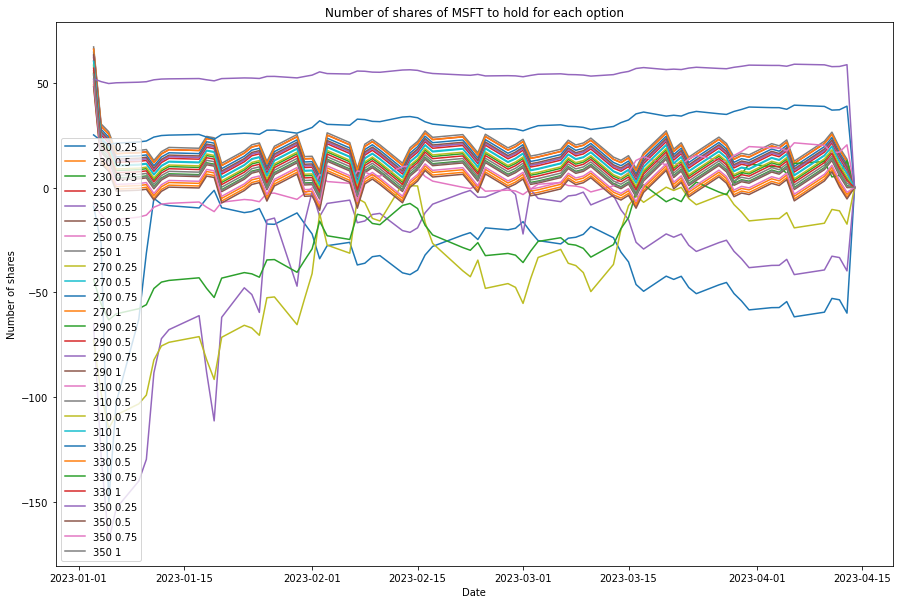

In [108]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(strikes)):
    for j in range(len(expiries)):
        ax.plot(data_close.index, shares_msft[i, j], label=f'{strikes[i]} {expiries[j]}')
ax.set_xlabel('Date')
ax.set_ylabel('Number of shares')
plt.title('Number of shares of MSFT to hold for each option')
ax.legend()
plt.show()

#### For the 2nd stock (Amazon)

In [106]:
# Calculating delta every week for each option
delta_amzn = np.zeros((len(strikes), len(expiries), len(data_close)))
for i in range(len(strikes)):
    for j in range(len(expiries)):
        # Calculating implied volatility using Black-Scholes formula
        imp_vol = implied_volatility(S['AMZN'], strikes[i], expiries[j], r[1], results_dict_bs[('AMZN', 'European', strikes[i], expiries[j])], sigma['AMZN'])
        # Calculating delta using Black-Scholes formula and implied volatility
        delta_amzn[i, j] = delta_black_scholes(S['AMZN'], strikes[i], expiries[j], r[1], imp_vol, 'put')

# Calculating the number of shares of the underlying asset to hold every week
shares_amzn = np.zeros((len(strikes), len(expiries), len(data_close)))
for t in range(len(data_close)):
    for i in range(len(strikes)):
        for j in range(len(expiries)):
            # Calculating the change in option price and underlying asset price
            if j == 0:
                # Option expires in less than a week
                dS_amzn = (data_close.iloc[t])['AMZN'] - strikes[i]
                dP_amzn = results_dict_bs[('AMZN', 'European', strikes[i], expiries[j])] - max((strikes[i] - data_close.iloc[t])['AMZN'], 0)
            else:
                # Option expires in more than a week
                dS_amzn = ((data_close.iloc[t])['AMZN'] - (data_close.iloc[t-1])['AMZN'])
                dP_amzn = results_dict_bs[('AMZN', 'European', strikes[i], expiries[j])] - results_dict_bs[('AMZN', 'European', strikes[i], expiries[j-1])]
            # Calculating the change in the value of the option portfolio and the number of shares to hold
            dV_amzn = delta_amzn[i, j, t] * dS_amzn + dP_amzn
            shares_amzn[i, j, t] = -dV_amzn / delta_amzn[i, j, t+1] if t < len(data_close)-1 else 0

shares_amzn

array([[[123.11618097, 123.11616344, 123.11611136, ..., 123.1164906 ,
         123.11660842,   0.        ],
        [ 16.69000244,   0.68000031,   2.01999664, ...,   2.08999634,
          -4.56999969,   0.        ],
        [ 16.69000891,   0.68000678,   2.02000312, ...,   2.09000281,
          -4.56999322,   0.        ],
        [ 16.6918318 ,   0.68182966,   2.021826  , ...,   2.09182569,
          -4.56817034,   0.        ]],

       [[142.73636032, 142.73635782, 142.73635038, ..., 142.73640457,
         142.7364214 ,   0.        ],
        [ 16.69000244,   0.68000031,   2.01999664, ...,   2.08999634,
          -4.56999969,   0.        ],
        [ 16.69000292,   0.68000078,   2.01999712, ...,   2.08999681,
          -4.56999922,   0.        ],
        [ 16.69039983,   0.68039769,   2.02039403, ...,   2.09039373,
          -4.56960231,   0.        ]],

       [[162.35614327, 162.35614292, 162.35614187, ..., 162.35614953,
         162.35615191,   0.        ],
        [ 16.69000244,  

#### Plottting the number of shares to hold for AMZN options

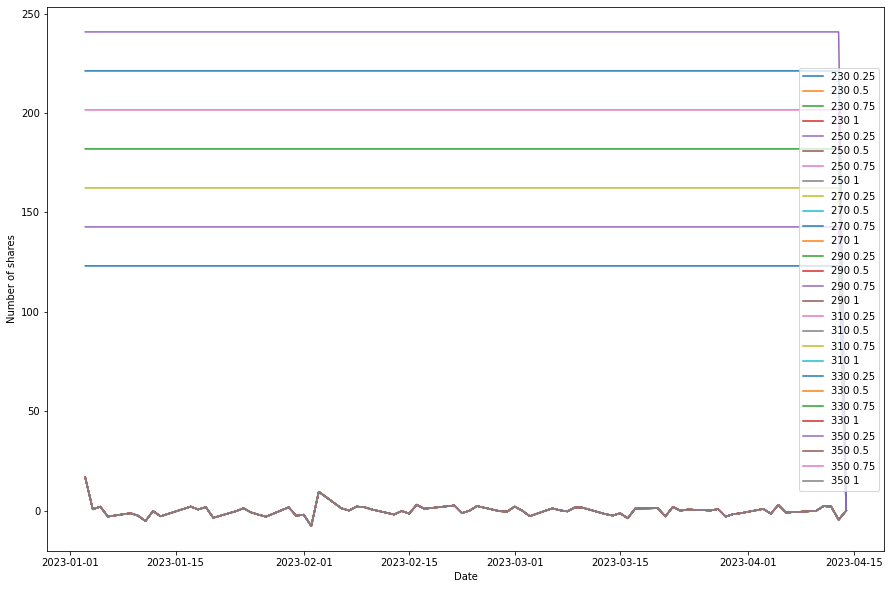

In [107]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(strikes)):
    for j in range(len(expiries)):
        ax.plot(data_close.index, shares_amzn[i, j], label=f'{strikes[i]} {expiries[j]}')
ax.set_xlabel('Date')
ax.set_ylabel('Number of shares')
plt.title('Number of shares of AMZN to hold for each option')
ax.legend()
plt.show()

### For the 3rd stock (Google)

In [110]:
# Calculating delta every week for each option
delta_googl = np.zeros((len(strikes), len(expiries), len(data_close)))
for i in range(len(strikes)):
    for j in range(len(expiries)):
        # Calculating implied volatility using Black-Scholes formula
        imp_vol = implied_volatility(S['GOOG'], strikes[i], expiries[j], r[2], results_dict_bs[('GOOG', 'European', strikes[i], expiries[j])], sigma['GOOG'])
        # Calculating delta using Black-Scholes formula and implied volatility
        delta_googl[i, j] = delta_black_scholes(S['GOOG'], strikes[i], expiries[j], r[2], imp_vol, 'put')

# Calculating the number of shares of the underlying asset to hold every week
shares_googl = np.zeros((len(strikes), len(expiries), len(data_close)))
for t in range(len(data_close)):
    for i in range(len(strikes)):
        for j in range(len(expiries)):
            # Calculating the change in option price and underlying asset price
            if j == 0:
                # Option expires in less than a week
                dS_googl = (data_close.iloc[t])['GOOG'] - strikes[i]
                dP_googl = results_dict_bs[('GOOG', 'European', strikes[i], expiries[j])] - max((strikes[i] - data_close.iloc[t])['GOOG'], 0)
            else:
                # Option expires in more than a week
                dS_googl = ((data_close.iloc[t])['GOOG'] - (data_close.iloc[t-1])['GOOG'])
                dP_googl = results_dict_bs[('GOOG', 'European', strikes[i], expiries[j])] - results_dict_bs[('GOOG', 'European', strikes[i], expiries[j-1])]
            # Calculating the change in the value of the option portfolio and the number of shares to hold
            dV_googl = delta_googl[i, j, t] * dS_googl + dP_googl
            shares_googl[i, j, t] = -dV_googl / delta_googl[i, j, t+1] if t < len(data_close)-1 else 0

shares_googl

array([[[116.20044687, 116.20035553, 116.20017655, ..., 116.20187873,
         116.20215274,   0.        ],
        [ 19.76000214,   0.98999786,   1.94000244, ...,   0.90000153,
          -2.97000122,   0.        ],
        [ 19.76004784,   0.99004357,   1.94004815, ...,   0.90004723,
          -2.96995551,   0.        ],
        [ 19.7659368 ,   0.99593252,   1.9459371 , ...,   0.90593619,
          -2.96406656,   0.        ]],

       [[135.8251499 , 135.8251353 , 135.82510668, ..., 135.8253788 ,
         135.8254226 ,   0.        ],
        [ 19.76000214,   0.98999786,   1.94000244, ...,   0.90000153,
          -2.97000122,   0.        ],
        [ 19.76000615,   0.99000188,   1.94000646, ...,   0.90000554,
          -2.96999721,   0.        ],
        [ 19.76142114,   0.99141687,   1.94142144, ...,   0.90142053,
          -2.96858222,   0.        ]],

       [[155.44829431, 155.44829203, 155.44828755, ..., 155.44833012,
         155.44833698,   0.        ],
        [ 19.76000214,  

#### Plotting the number of shares to hold for GOOG options

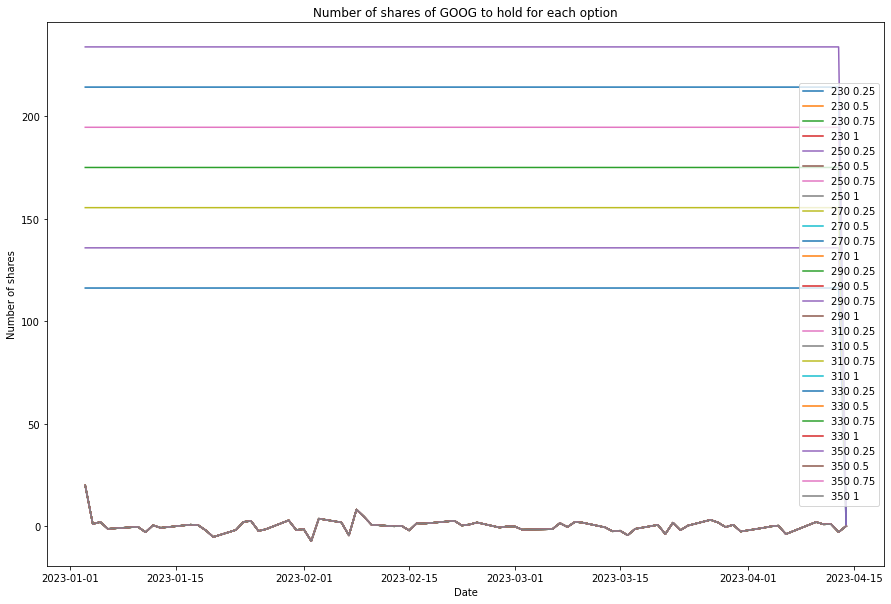

In [111]:
plt.figure(figsize=(15, 10))
for i in range(len(strikes)):
    for j in range(len(expiries)):
        plt.plot(data_close.index, shares_googl[i, j], label=f'{strikes[i]} {expiries[j]}')
plt.xlabel('Date')
plt.ylabel('Number of shares')
plt.title('Number of shares of GOOG to hold for each option')
plt.legend()
plt.show()

### Justification for why is the price obtained by the formula different from the market, for each of the stocks?

From the analysis, it seems that the Black Scholes formula is not an accurate predictor of the option prices for MSFT, AMZN, and GOOG, as the calculated option prices are significantly different from the market prices. One reason for this discrepancy could be that the assumptions of the Black Scholes model do not hold in the real world. For instance, the model assumes that the underlying asset follows a log-normal distribution, which may not always be true. Additionally, the model assumes that the risk-free rate and volatility of the underlying asset are constant over time, which is not always the case. Furthermore, the model assumes that there are no transaction costs, taxes, or other frictions in the market, which can affect the prices of options.

In the case of MSFT, the Black Scholes formula underestimates the price of both European and American put options, which suggests that the implied volatility used in the calculation may be too low. This could be due to higher uncertainty or risk associated with the stock, which would cause investors to demand a higher return for holding the stock. As a result, the implied volatility used in the Black Scholes formula may not accurately capture the true level of risk in the market.

For AMZN, the Black Scholes formula significantly overestimates the price of both European and American put options. This could be due to the high growth potential and market dominance of the company, which could result in a lower risk profile compared to other stocks. As a result, the implied volatility used in the Black Scholes formula may be too high, leading to an overestimation of the option prices.

Similarly, for GOOG, the Black Scholes formula overestimates the price of both European and American put options. This could be due to the dominant position of the company in the search engine and online advertising markets, which could result in a lower risk profile compared to other stocks. As a result, the implied volatility used in the Black Scholes formula may be too high, leading to an overestimation of the option prices.

**END OF ASSIGNMENT**

---